important 変数を個々に定義する

In [1]:
SensorNum=2 # Sensor number
SampleNum=32 # Window Width
Overlap=0.5 # overlap
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccY' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-11'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccY is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(7960, 32)

**前回やった学習をもう１度やってみる**

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 2s - loss: 0.0745 - val_loss: 0.0239
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0198 - val_loss: 0.0175
Epoch 3/50
7960/7960 [==============================] - 2s - loss: 0.0162 - val_loss: 0.0152
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0145 - val_loss: 0.0138
Epoch 5/50
7960/7960 [==============================] - 2s - loss: 0.0132 - val_loss: 0.0126
Epoch 6/50
7960/7960 [==============================] - 2s - loss: 0.0122 - val_loss: 0.0117
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 0.0114 - val_loss: 0.0110
Epoch 8/50
7960/7960 [==============================] - 2s - loss: 0.0107 - val_loss: 0.0104
Epoch 9/50
7960/7960 [==============================] - 2s - loss: 0.0102 - val_loss: 0.0099
Epoch 10/50
7960/7960 [==============================] - 2s - loss: 0.0097 - val_loss: 0.0095
Epoch 11/50
7960/7960

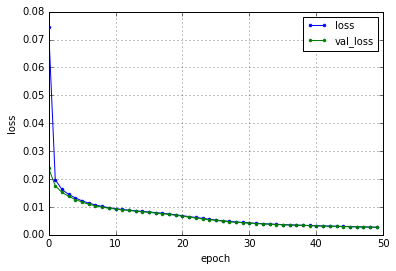

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 1s - loss: 0.0528 - val_loss: 0.0214
Epoch 2/50
7960/7960 [==============================] - 1s - loss: 0.0184 - val_loss: 0.0161
Epoch 3/50
7960/7960 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0128
Epoch 4/50
7960/7960 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0105
Epoch 5/50
7960/7960 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0087
Epoch 6/50
7960/7960 [==============================] - 1s - loss: 0.0080 - val_loss: 0.0076
Epoch 7/50
7960/7960 [==============================] - 2s - loss: 0.0070 - val_loss: 0.0065
Epoch 8/50
7960/7960 [==============================] - 1s - loss: 0.0062 - val_loss: 0.0058
Epoch 9/50
7960/7960 [==============================] - 1s - loss: 0.0055 - val_loss: 0.0053
Epoch 10/50
7960/7960 [==============================] - 1s - loss: 0.0051 - val_loss: 0.0048
Epoch 11/50
7960/7960

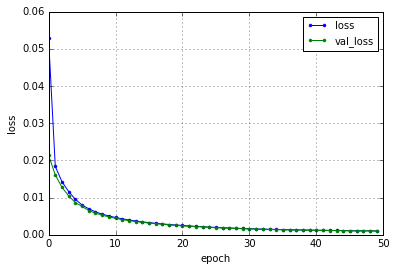

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0187
Epoch 2/50
7960/7960 [==============================] - 0s - loss: 0.0157 - val_loss: 0.0135
Epoch 3/50
7960/7960 [==============================] - 0s - loss: 0.0119 - val_loss: 0.0103
Epoch 4/50
7960/7960 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0082
Epoch 5/50
7960/7960 [==============================] - 0s - loss: 0.0075 - val_loss: 0.0069
Epoch 6/50
7960/7960 [==============================] - 1s - loss: 0.0063 - val_loss: 0.0058
Epoch 7/50
7960/7960 [==============================] - 1s - loss: 0.0054 - val_loss: 0.0050
Epoch 8/50
7960/7960 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0044
Epoch 9/50
7960/7960 [==============================] - 0s - loss: 0.0042 - val_loss: 0.0040
Epoch 10/50
7960/7960 [==============================] - 1s - loss: 0.0039 - val_loss: 0.0037
Epoch 11/50
7960/7960

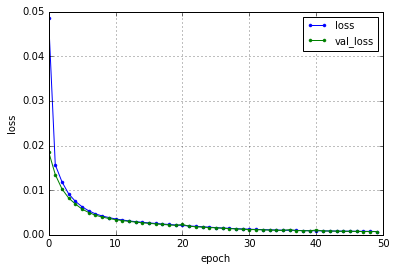

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 1s - loss: 0.0519 - val_loss: 0.0172
Epoch 2/50
7960/7960 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0121
Epoch 3/50
7960/7960 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0086
Epoch 4/50
7960/7960 [==============================] - 1s - loss: 0.0074 - val_loss: 0.0064
Epoch 5/50
7960/7960 [==============================] - 1s - loss: 0.0057 - val_loss: 0.0050
Epoch 6/50
7960/7960 [==============================] - 1s - loss: 0.0046 - val_loss: 0.0042
Epoch 7/50
7960/7960 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0035
Epoch 8/50
7960/7960 [==============================] - 1s - loss: 0.0034 - val_loss: 0.0031
Epoch 9/50
7960/7960 [==============================] - 1s - loss: 0.0030 - val_loss: 0.0028
Epoch 10/50
7960/7960 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0025
Epoch 11/50
7960/7960

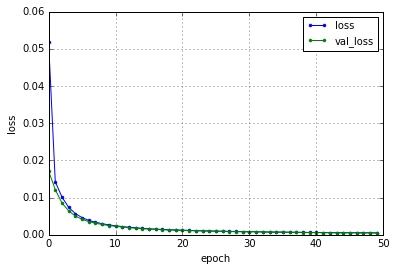

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0112
Epoch 2/50
7960/7960 [==============================] - 1s - loss: 0.0077 - val_loss: 0.0053
Epoch 3/50
7960/7960 [==============================] - 1s - loss: 0.0044 - val_loss: 0.0037
Epoch 4/50
7960/7960 [==============================] - 1s - loss: 0.0033 - val_loss: 0.0028
Epoch 5/50
7960/7960 [==============================] - 1s - loss: 0.0026 - val_loss: 0.0024
Epoch 6/50
7960/7960 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0020
Epoch 7/50
7960/7960 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0017
Epoch 8/50
7960/7960 [==============================] - 1s - loss: 0.0016 - val_loss: 0.0015
Epoch 9/50
7960/7960 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
7960/7960 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0012
Epoch 11/50
7960/7960

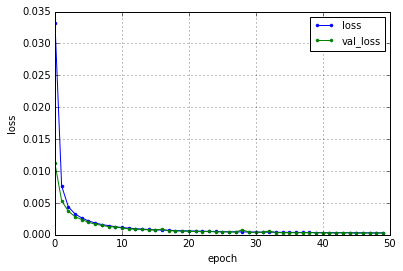

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 1s - loss: 0.0188 - val_loss: 0.0054
Epoch 2/50
7960/7960 [==============================] - 1s - loss: 0.0038 - val_loss: 0.0027
Epoch 3/50
7960/7960 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0019
Epoch 4/50
7960/7960 [==============================] - 1s - loss: 0.0017 - val_loss: 0.0014
Epoch 5/50
7960/7960 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0011
Epoch 6/50
7960/7960 [==============================] - 1s - loss: 0.0011 - val_loss: 9.4402e-04
Epoch 7/50
7960/7960 [==============================] - 0s - loss: 9.1808e-04 - val_loss: 9.2152e-04
Epoch 8/50
7960/7960 [==============================] - 1s - loss: 7.9713e-04 - val_loss: 7.0340e-04
Epoch 9/50
7960/7960 [==============================] - 1s - loss: 7.0373e-04 - val_loss: 6.5310e-04
Epoch 10/50
7960/7960 [==============================] - 0s - loss: 6.3611e-04 - val_lo

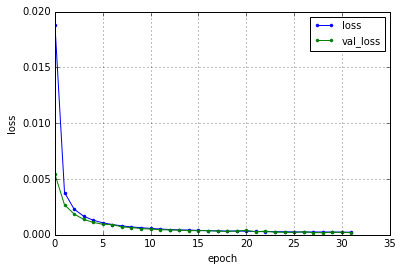

In [9]:
# define SaveFileName
for encoding_dim in EncodingDim:
    SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

    window_test=windoW
    window_train=windoW
    processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
    processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
    shapeNum=windoW.shape[1]

    # this is our input placeholder
    input_img = Input(shape=(shapeNum,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='tanh')(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(shapeNum, activation='linear')(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input=input_img, output=decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input=input_img, output=encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adadelta', loss='mse')
    plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

    early_stopping = EarlyStopping(monitor='val_loss', patience=2)
    hist = autoencoder.fit(window_train, window_train,
                    nb_epoch=50,
                    batch_size=shapeNum/4,
                    shuffle=True,
                    validation_data=(window_test, window_test),
                    callbacks=[early_stopping])

    encoded_imgs = encoder.predict(window_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
    processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

    # save model and wights
    json_string = encoder.to_json()
    open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
    encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5')

    json_string = decoder.to_json()
    open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
    decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5')

    json_string = autoencoder.to_json()
    open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
    autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5')

    # plot loss
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    nb_epoch = len(loss)
    plt.plot(range(nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig(SaveFileNameGlaph)
    plt.show()
    time.sleep(5)